# Preprocessing

In [ ]:
data = open('/home/rashi/Downloads/retaskdataset/atis-2.train.w-intent.iob.txt','rt')
contents = data.readlines()

+++++++++++++

In [ ]:
# print(contents)

In [ ]:
import re
# text = contents.split("EOS")
# text = re.split('\t', contents)
# text1 = re.split('\n', text)
text_new = [x.replace('BOS','') for x in contents]

In [ ]:
b = []
final = []

In [ ]:
for i in text_new:
    b.extend(i.split('\t'))

In [ ]:
for i in b:
    final.extend(i.split('\n'))

In [ ]:
text_main = [y.replace('EOS','') for y in final]

In [ ]:
while('EOS' in final):
    final.remove('EOS')

In [ ]:

while('' in text_main):
    text_main.remove('')

In [ ]:
# text_main

In [ ]:
tags = []
count = 0
for i,val in enumerate(text_main):
    if i%2 != 0:
        tags.append(val)
    
#         i = i + 1
# tags

In [ ]:
sen = []
for i,val in enumerate(text_main):
    if i%2 == 0:
        sen.append(val)

In [ ]:
label = []
for i,p in enumerate(tags):
    label.append(p.split())
label1 = []

In [ ]:
len(label)

In [ ]:
final_label = []
for y in label:
    final_label.append(y[-1])

In [ ]:
len(final_label)

In [ ]:
len(tags)

In [ ]:
len(sen)

In [ ]:
dictionaryy = [{'final_label':fl, 'sen': sen, 'tags': tags} for fl,sen,tags in zip(final_label,sen,tags)]

In [ ]:
import pandas as pd
df = pd.DataFrame(dictionaryy)

In [ ]:
df.head()

In [ ]:
df.to_csv('C:/Users/BUD3KOR/Downloads/intent_recognition/retaskdataset/train.csv')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
sentence = 'i want to fly from baltimore'
doc = nlp(sentence)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 


In [ ]:
uni = df.final_label

In [ ]:
import numpy as np
len(np.unique(uni))

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('final_label').sen.count().plot.bar(ylim=0)
plt.show()

## Created a new column to encode the intent

In [ ]:
# len(train['final_label'].value_counts())

In [1]:
import pandas as pd
train = pd.read_csv('/home/rashi/Downloads/IER/retaskdataset/train_new.csv', encoding = 'latin-1')
test = pd.read_csv('/home/rashi/Downloads/IER/retaskdataset/test_new.csv',encoding = 'latin-1')

In [4]:
train.shape, test.shape

((4470, 6), (889, 6))

In [5]:
train.head()

,Unnamed: 0,Unnamed: 0.1,final+AF8-label,final+AF8-label1,sen,tags
0,0,0,atis+AF8-flight,11,i want to fly from baltimore to dallas round ...,O O O O O O B+AC0-fromloc.city+AF8-name O B+AC...
1,1,1,atis+AF8-airfare,3,round trip fares from baltimore to philadelph...,O B+AC0-round+AF8-trip I+AC0-round+AF8-trip O ...
2,2,2,atis+AF8-flight,11,show me the flights arriving on baltimore on ...,O O O O O O O B+AC0-toloc.city+AF8-name O B+AC...
3,3,3,atis+AF8-flight,11,what are the flights which depart from san fr...,O O O O O O O O B+AC0-fromloc.city+AF8-name I+...
4,4,4,atis+AF8-airline,4,which airlines fly from boston to washington ...,O O O O O B+AC0-fromloc.city+AF8-name O B+AC0-...


In [2]:
train = train.rename(columns={"final+AF8-label1": "final_label1"})
test = test.rename(columns={"final+AF8-label1": "final_label1"})

In [3]:
# from sklearn.preprocessing import LabelEncoder
# Encoder = LabelEncoder()
# train['final_label1'] = Encoder.fit_transform(train['final_label'])
# test['final_label1'] = Encoder.fit_transform(test['final_label'])
# # Train_Y

In [4]:
train.head()

,Unnamed: 0,Unnamed: 0.1,final+AF8-label,final_label1,sen,tags
0,0,0,atis+AF8-flight,11,i want to fly from baltimore to dallas round ...,O O O O O O B+AC0-fromloc.city+AF8-name O B+AC...
1,1,1,atis+AF8-airfare,3,round trip fares from baltimore to philadelph...,O B+AC0-round+AF8-trip I+AC0-round+AF8-trip O ...
2,2,2,atis+AF8-flight,11,show me the flights arriving on baltimore on ...,O O O O O O O B+AC0-toloc.city+AF8-name O B+AC...
3,3,3,atis+AF8-flight,11,what are the flights which depart from san fr...,O O O O O O O O B+AC0-fromloc.city+AF8-name I+...
4,4,4,atis+AF8-airline,4,which airlines fly from boston to washington ...,O O O O O B+AC0-fromloc.city+AF8-name O B+AC0-...


In [9]:
# len(test['final_label1'].unique)
import numpy as np
ki = np.unique(train['final+AF8-label']).tolist()
ki

['atis+AF8-abbreviation',
 'atis+AF8-aircraft',
 'atis+AF8-airfare',
 'atis+AF8-airline',
 'atis+AF8-airport',
 'atis+AF8-capacity',
 'atis+AF8-city',
 'atis+AF8-distance',
 'atis+AF8-flight',
 'atis+AF8-flight+ACM-atis+AF8-airfare',
 'atis+AF8-flight+AF8-no',
 'atis+AF8-flight+AF8-no+ACM-atis+AF8-airline',
 'atis+AF8-flight+AF8-time',
 'atis+AF8-ground+AF8-fare',
 'atis+AF8-ground+AF8-service',
 'atis+AF8-meal',
 'atis+AF8-quantity']

In [10]:
li = np.unique(test['final+AF8-label']).tolist()
li

['atis+AF8-abbreviation',
 'atis+AF8-aircraft',
 'atis+AF8-airfare',
 'atis+AF8-airline',
 'atis+AF8-airport',
 'atis+AF8-capacity',
 'atis+AF8-city',
 'atis+AF8-distance',
 'atis+AF8-flight',
 'atis+AF8-flight+ACM-atis+AF8-airfare',
 'atis+AF8-flight+AF8-no',
 'atis+AF8-flight+AF8-no+ACM-atis+AF8-airline',
 'atis+AF8-flight+AF8-time',
 'atis+AF8-ground+AF8-fare',
 'atis+AF8-ground+AF8-service',
 'atis+AF8-meal',
 'atis+AF8-quantity']

In [11]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 
print(Diff(li,ki) )

[]


In [14]:
test = test.rename(columns={"final+AF8-label1": "final_label1"})

In [12]:
test.head()

,Unnamed: 0,Unnamed: 0.1,final+AF8-label,final_label_1,sen,tags
0,0,0,atis+AF8-flight,10,i would like to find a flight from charlotte ...,O O O O O O O O O B+AC0-fromloc.city+AF8-name ...
1,1,1,atis+AF8-airfare,2,on april first i need a ticket from tacoma to...,O O B+AC0-depart+AF8-date.month+AF8-name B+AC0...
2,2,2,atis+AF8-flight,10,on april first i need a flight going from pho...,O O B+AC0-depart+AF8-date.month+AF8-name B+AC0...
3,3,3,atis+AF8-flight,10,i would like a flight traveling one way from ...,O O O O O O O B+AC0-round+AF8-trip I+AC0-round...
4,4,4,atis+AF8-flight,10,i would like a flight from orlando to salt la...,O O O O O O O B+AC0-fromloc.city+AF8-name O B+...


17


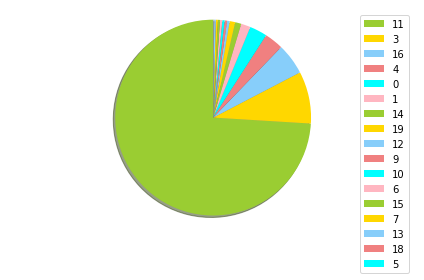

In [18]:
# Visualizing Outcome Distribution
import matplotlib.pyplot as plt
temp = train["final_label_1"].value_counts()
print(len(temp))
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=3.0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
# train['sen']=[" ".join(review) for review in train['sen'].values]
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(train.sen).toarray()
labels = train['final_label1']
features.shape

(4470, 831)

In [7]:
X_m = features

In [8]:
X_m.shape

(4470, 831)

In [9]:
from sklearn.decomposition import FastICA
FastICA = FastICA(n_components=424, algorithm = 'parallel',whiten = True,max_iter = 100,  random_state=2019)
X_fica = FastICA.fit_transform(X_m)

In [10]:
X_fica

array([[-2.08680940e-03, -3.99763088e-04,  7.13812981e-04, ...,
        -1.25257825e-03,  1.54021716e-03,  8.54831271e-05],
       [-3.00718075e-01,  5.69623071e-04,  3.20422595e-04, ...,
         9.96613924e-04, -5.05154650e-04, -7.12356628e-04],
       [ 1.20426978e-03, -5.31466370e-05, -5.54232111e-04, ...,
         3.07314637e-03,  6.80359630e-03, -2.04041950e-03],
       ...,
       [ 7.90967963e-04,  1.20998653e-04, -7.81674750e-04, ...,
         6.11588621e-03,  1.20180463e-03, -1.34517590e-03],
       [ 3.86370568e-05,  1.17270687e-04, -6.67190463e-04, ...,
         3.08598706e-03,  3.33044583e-03, -3.09574168e-04],
       [ 1.53778455e-03,  1.07338149e-03,  8.19592745e-05, ...,
         2.25652720e-03,  5.53108506e-03, -1.45200110e-03]])

In [11]:
X_fica.shape

(4470, 424)

In [12]:
from sklearn.preprocessing import MinMaxScaler
features_n = MinMaxScaler().fit_transform(X_fica)

In [13]:
features_n.shape

(4470, 424)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
# train['sen']=[" ".join(review) for review in train['sen'].values]
tfidf = TfidfVectorizer()
features_test = tfidf.fit_transform(test.sen).toarray()
features_test = MinMaxScaler().fit_transform(features_test)
features_test.shape

(889, 424)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_val, y_train, y_val = train_test_split(train['sen'], train['final_label1'],test_size = 0.3, random_state = 0)
# X_train, y_train = train['sen'], train['final_label']

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
print(clf.predict(count_vect.transform([' round trip fares from baltimore to philadelphia less than 1000 dollars round trip fares from denver to philadelphia less than 1000 dollars round trip fares from pittsburgh to philadelphia less than 1000 dollars '])))

[3]


In [28]:
print(clf.predict(count_vect.transform([' what day of the week do flights from nashville to tacoma fly on '])))

[11]


In [29]:
print(clf.predict(count_vect.transform([' how many flights does twa have in business class '])))

[19]


In [30]:
print(clf.predict(count_vect.transform(["which different airlines go from las vegas to new york city "])))
# 4

[11]


In [31]:
print(clf.predict(count_vect.transform(['what is the ground transportation between the charlotte airport charlotte airport and downtown charlotte '])))
# 17

[16]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_n, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

/home/rashi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/rashi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/rashi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rashi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ra

NameError: name 'plt' is not defined

In [17]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.957295
MultinomialNB             0.740279
RandomForestClassifier    0.741396
Name: accuracy, dtype: float64

In [34]:
model = LinearSVC()
X_train, X_val, y_train, y_val, indices_train, indices_test = train_test_split(features_n, labels, train.index, test_size=0.33, random_state=0)
# X_train, y_train, indices_train = features_n, labels, train.index
model.fit(X_train, y_train)

C:\Users\BUD3KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# model.fit(X_train, y_train)
model_pred_train = model.predict(X_train)
print(accuracy_score(y_train,model_pred_train))   #Train accuracy

0.9929859719438878


In [ ]:
model_pred_train.shape

In [36]:
labels = test['final_label1']

In [ ]:
# X_test,y_test = features_test, test['']

In [37]:
y_pred = model.predict(X_val)

In [38]:
y_pred

array([14, 10, 11, ..., 11, 11, 11], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_val,y_pred))        #Validation ACCURACY

0.9566395663956639


In [40]:
print(model.predict(X_val[10:20]))

[11 11  1 11 11 11  3 13  3 11]


In [41]:
y_val[10:20]

2718    11
4142    11
2057     1
3916    11
2188    11
2847    11
3126     3
1005    13
917      3
675     11
Name: final_label1, dtype: int64

# Test Set 

In [42]:
labels_test = test['final_label1']

In [43]:
import numpy as np
len(np.unique(train['final_label1']))

17

In [46]:
features_test.shape

(889, 424)

In [35]:
X_test1, y_test1= features_test, test['final_label_1']
y_pred1 = model.predict(X_test1)

In [60]:
model.predict(X_test1[10:20])

array([11,  4,  4,  4,  3,  3, 11,  0,  0,  3], dtype=int64)

In [61]:
y_test1[10:20]

10    10
11    10
12    11
13    10
14    10
15    10
16    10
17    10
18    10
19    10
Name: final_label1, dtype: int64

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_pred_test = model.predict(features_test)
print(accuracy_score(test['final_label1'] ,model_pred_test))  
# print(accuracy_score(features_test, y_pred1))        #TEST ACCURACY

0.010123734533183352


In [ ]:
#FAILS ON TEST DATASET.


In [ ]:
# XGBoost

In [29]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier()
X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(features_n, labels, train.index, test_size=0.33, random_state=0)


In [30]:
xgmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [31]:
y_pred = xgmodel.predict(X_val)
predictions = [round(value) for value in y_pred]

In [32]:
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.48%


In [56]:
xgmodel.predict(X_val[20:40])

array([11, 16, 11, 11, 16, 11, 11, 11, 11, 11, 11, 11, 16, 11, 11, 11, 11,
       11, 11, 11])

In [57]:
y_val[20:40]

3603    11
3010    16
3598    11
3878    11
4427    16
214     11
1540    11
1559    11
927     11
3170    11
3975    11
1804    11
4127    16
1379    11
3284    11
2628    11
683     11
1491    11
4237    11
4436    11
Name: final_label_1, dtype: int64

In [55]:
# Test set from the test file
xgmodel.predict(X_test1[20:40])

array([ 3,  3,  3, 10, 10,  3,  3,  3, 10, 10,  3, 10,  9, 10,  9,  9,  3,
        3,  3,  3])

In [54]:
y_test1[20:40]

20    10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    17
33    10
34    10
35    10
36    10
37    10
38    10
39    10
Name: final_label_1, dtype: int64

In [49]:
xgmodel_pred_test = xgmodel.predict(features_test)
print(accuracy_score(test['final_label_1'] ,xgmodel_pred_test))

0.012373453318335208


In [ ]:
# Slightly better than Linear SVC